<a href="https://colab.research.google.com/github/skourta/clustering_eval/blob/main/MFEAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("R.matlab")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [ ]:
install.packages(c("Rmixmod", "NbClust", "mclust", "FactoMineR", "Rmixmod", "Rtsne", "lle", "cluster", "aricode", "caret"))

In [ ]:
install.packages("umap")

# 1 Introduction au tables de donnees

In [ ]:
library(R.matlab)
library(Rmixmod)
library(mclust)
library(NbClust)
library(FactoMineR)
library(lle)
library(cluster)
library(aricode)
library(Rtsne)
library(caret)
library(umap)

R.matlab v3.6.2 (2018-09-26) successfully loaded. See ?R.matlab for help.


Attaching package: ‘R.matlab’


The following objects are masked from ‘package:base’:

    getOption, isOpen


Loading required package: Rcpp

Rmixmod v. 2.1.6 / URI: www.mixmod.org

Package 'mclust' version 5.4.9
Type 'citation("mclust")' for citing this R package in publications.

Loading required package: scatterplot3d

Loading required package: MASS

Loading required package: snowfall

Loading required package: snow

Loading required package: ggplot2

Loading required package: lattice

Warning message:
“Failed to locate timezone database”


In [ ]:
mfeat=readMat("data/MFEAT1.mat")

# MFEAT

## Visualisation des donnees

In [ ]:
pca.mfeat=PCA((mfeat$X),ncp=2)

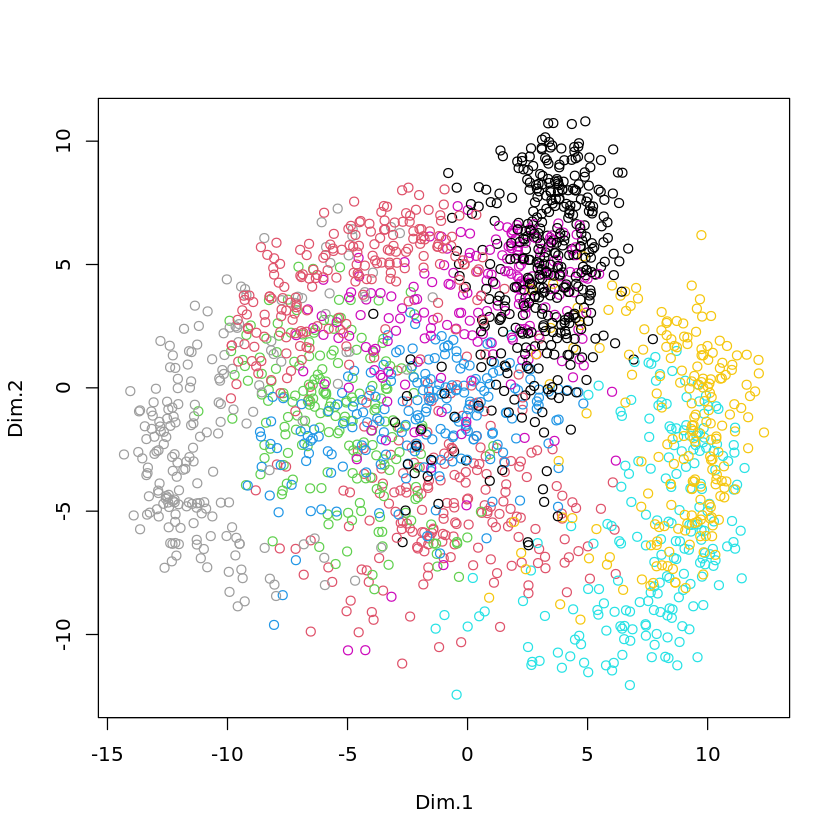

In [ ]:
plot(pca.mfeat$ind$coord,col=mfeat$y)

In [ ]:
tsne.mfeat=Rtsne(mfeat$X,dim=2, check_duplicates = F)

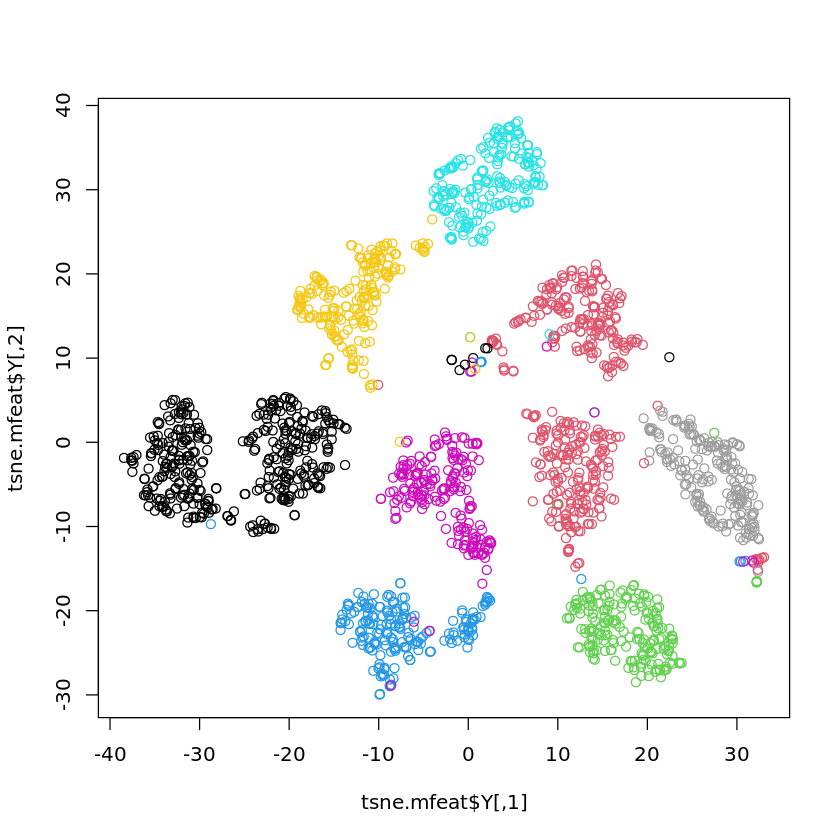

In [ ]:
plot(tsne.mfeat$Y,col=mfeat$y)

## 3.Partitionnement

### Kmeans

In [ ]:
km.mfeat=NbClust(mfeat$X, method = "kmeans", distance = "euclidean", index = "silhouette")

In [ ]:
km.mfeat$Best.nc

Number_clusters     Value_Index 
        12.0000          0.1393

### Average

In [ ]:
average.mfeat=NbClust(mfeat$X, method = "average", index = "silhouette")

In [ ]:
average.mfeat$Best.nc

Number_clusters     Value_Index 
        13.0000          0.1216

### Ward

In [ ]:
ward.mfeat=NbClust(mfeat$X, method = "ward.D", index = "silhouette")

In [ ]:
ward.mfeat$Best.nc

Number_clusters     Value_Index 
        14.0000          0.1251

### Single

In [ ]:
single.mfeat=NbClust(mfeat$X, method = "single", index = "silhouette")

In [ ]:
single.mfeat$Best.nc

Number_clusters     Value_Index 
         2.0000          0.0958

### Complete

In [ ]:
complete.mfeat=NbClust(mfeat$X, method = "complete", index = "silhouette")

In [ ]:
complete.mfeat$Best.nc

Number_clusters     Value_Index 
        15.0000          0.0808

## 4.HCPC

In [ ]:
hcpcward.mfeat=HCPC(pca.mfeat,method = "ward", nb.clust=-1)

In [ ]:
hcpcward.mfeat$call$t$nb.clust

[1] 3

In [ ]:
hcpccomp.mfeat=HCPC(pca.mfeat,method = "complete", nb.clust=-1)

In [ ]:
hcpccomp.mfeat$call$t$nb.clust

[1] 3

In [ ]:
hcpcsingle.mfeat=HCPC(pca.mfeat,method = "single", nb.clust=-1)

In [ ]:
hcpcsingle.mfeat$call$t$nb.clust

[1] 3

In [ ]:
hcpcav.mfeat=HCPC(pca.mfeat,method = "average", nb.clust=-1)

In [ ]:
hcpcav.mfeat$call$t$nb.clust

[1] 3

## 6. Confusion

In [ ]:
table(ward.mfeat$Best.partition, hcpcward.mfeat$data.clust$clust)

    
       1   2   3
  1    0 192   1
  2   44   6  32
  3    5 198  10
  4    0  10 113
  5  118  10  42
  6    0   0  96
  7   54  88   0
  8   89   0   6
  9  155   0   0
  10 107   2   0
  11 113  17   0
  12 108  57  11
  13  11 139   3
  14   0  10 153

In [ ]:
table(ward.mfeat$Best.partition, hcpcward.mfeat$data.clust$clust)

    
       1   2   3
  1    0 192   1
  2   44   6  32
  3    5 198  10
  4    0  10 113
  5  118  10  42
  6    0   0  96
  7   54  88   0
  8   89   0   6
  9  155   0   0
  10 107   2   0
  11 113  17   0
  12 108  57  11
  13  11 139   3
  14   0  10 153

## 7.Melange

In [ ]:
pca.mfeat = PCA(t(mfeat$X), graph = FALSE)

In [ ]:
strategie=mixmodStrategy(algo="EM",initMethod="smallEM",nbTry=10,epsilonInInit=0.00001)

In [ ]:
mmgRmix.mfeat=mixmodCluster(data=as.data.frame(pca.mfeat$var$coord),nbCluster=4)

In [ ]:
mmgRmix.mfeat

****************************************
*** INPUT:
****************************************
* nbCluster =  4 
* criterion =  BIC 
****************************************
*** MIXMOD Models:
* list =  Gaussian_pk_Lk_C 
* This list includes only models with free proportions.
****************************************
* data (limited to a 10x10 matrix) =
    Dim.1  Dim.2   Dim.3   Dim.4    Dim.5   
V1  0.4092 0.1954  -0.5319 -0.2449  -0.28   
V2  0.5747 0.09643 -0.2521 -0.2741  -0.1616 
V3  0.5754 0.3212  -0.3316 -0.1006  -0.01099
V4  0.6975 0.1107  -0.345  -0.04816 -0.1171 
V5  0.5541 0.3564  -0.228  -0.1425  -0.2886 
V6  0.1428 0.03311 0.2316  -0.05643 -0.4443 
V7  0.409  0.3262  -0.5615 -0.157   -0.2572 
V8  0.466  0.258   -0.476  -0.173   -0.2368 
V9  0.3025 0.2721  -0.5728 -0.2258  -0.3213 
V10 0.5957 0.2019  -0.4142 0.0509   -0.1999 
* ... ...
****************************************
*** MIXMOD Strategy:
* algorithm            =  EM 
* number of tries      =  1 
* number of iteration

In [ ]:
length(mmgRmix.mfeat@bestResult@partition)

[1] 2000

In [ ]:
length(mfeat$y)

[1] 2000

In [ ]:
table(mmgRmix.mfeat@bestResult@partition,mfeat$y)

   
      1   2   3   4   5   6   7   8   9  10
  1   2  26   2   3 193   5 184   0   6   1
  2   1  16 196  12   4   9   0 147   1  30
  3  46 158   2 185   3 129  11  53  52 167
  4 151   0   0   0   0  57   5   0 141   2

In [ ]:
mmgMclust.mfeat=Mclust(data= mfeat$X, G=10)

In [ ]:
table( mmgMclust.mfeat$classification,mfeat$y)

    
       1   2   3   4   5   6   7   8   9  10
  1  200 198 200 198 200 196 196 196 200 198
  2    0   2   0   0   0   0   0   0   0   0
  3    0   0   0   2   0   0   0   0   0   0
  4    0   0   0   0   0   2   0   0   0   0
  5    0   0   0   0   0   2   0   0   0   0
  6    0   0   0   0   0   0   2   0   0   0
  7    0   0   0   0   0   0   2   0   0   0
  8    0   0   0   0   0   0   0   2   0   0
  9    0   0   0   0   0   0   0   2   0   0
  10   0   0   0   0   0   0   0   0   0   2

In [ ]:
mmgRmix.mfeat=mixmodCluster(data=as.data.frame(pca.mfeat$var$coord),nbCluster=10)

In [ ]:
mmgRmix.mfeat

****************************************
*** INPUT:
****************************************
* nbCluster =  10 
* criterion =  BIC 
****************************************
*** MIXMOD Models:
* list =  Gaussian_pk_Lk_C 
* This list includes only models with free proportions.
****************************************
* data (limited to a 10x10 matrix) =
    Dim.1  Dim.2   Dim.3   Dim.4    Dim.5   
V1  0.4092 0.1954  -0.5319 -0.2449  -0.28   
V2  0.5747 0.09643 -0.2521 -0.2741  -0.1616 
V3  0.5754 0.3212  -0.3316 -0.1006  -0.01099
V4  0.6975 0.1107  -0.345  -0.04816 -0.1171 
V5  0.5541 0.3564  -0.228  -0.1425  -0.2886 
V6  0.1428 0.03311 0.2316  -0.05643 -0.4443 
V7  0.409  0.3262  -0.5615 -0.157   -0.2572 
V8  0.466  0.258   -0.476  -0.173   -0.2368 
V9  0.3025 0.2721  -0.5728 -0.2258  -0.3213 
V10 0.5957 0.2019  -0.4142 0.0509   -0.1999 
* ... ...
****************************************
*** MIXMOD Strategy:
* algorithm            =  EM 
* number of tries      =  1 
* number of iteratio

In [ ]:
table(mmgRmix.mfeat@bestResult@partition,mfeat$y)

    
       1   2   3   4   5   6   7   8   9  10
  1    0   0  19   1   0  20   0  72   0  57
  2    5  18   1   3  89   7 111   0   7   1
  3  104   0   0   0   0  14   0   0  19   0
  4    1  13  30   6   6   4   1  17   0   2
  5   42   0   0   0   0  81  12   0 135   6
  6    0   2   0   0  99   0  74   0   0   0
  7    9 165   0 187   6  23   2   3  37   1
  8    2   2   0   0   0  50   0  27   2 129
  9   37   0   0   0   0   0   0   0   0   0
  10   0   0 150   3   0   1   0  81   0   4

Les 2 partitions sont tres bonnes

## 9. MclustDR
D'apres la doc MclustDR est une méthode de réduction de dimension pour visualiser la structure de regroupement ou de classification obtenue à partir d'un mélange fini de densités gaussiennes.


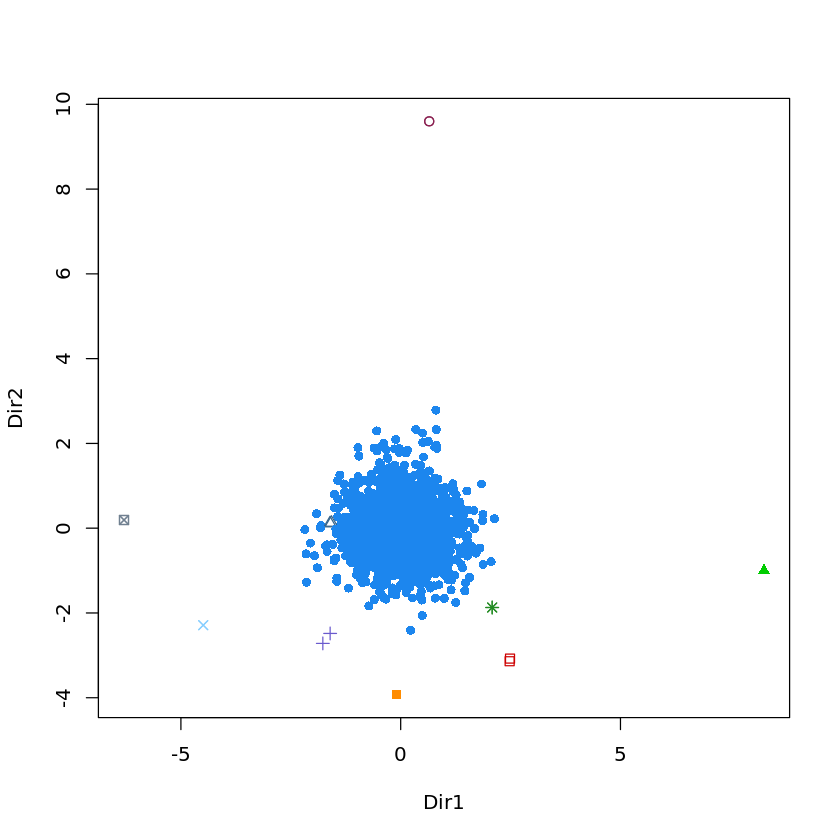

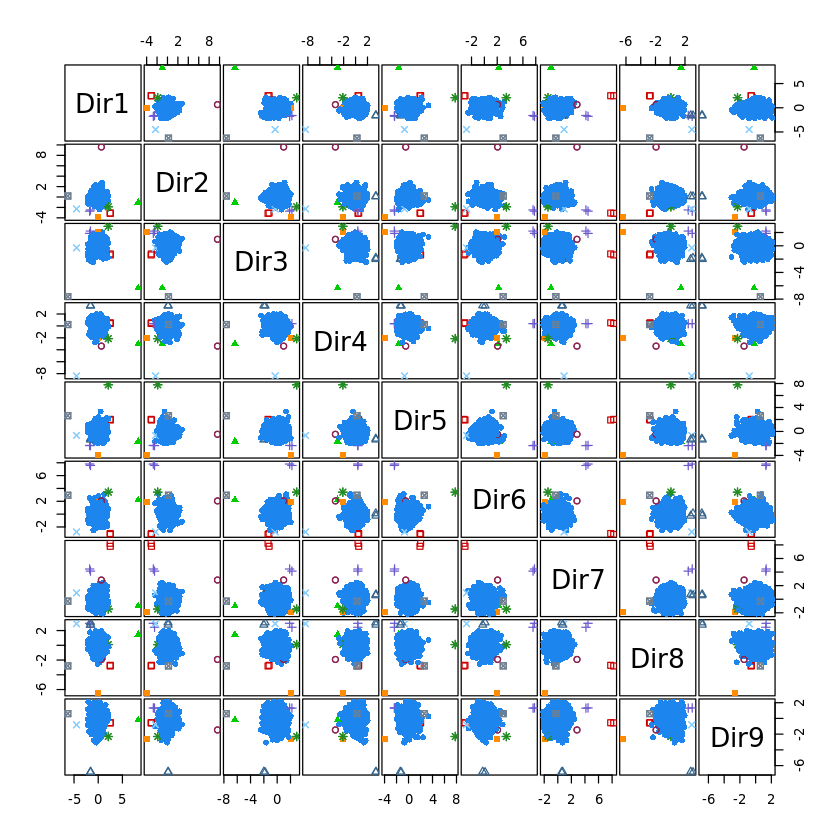

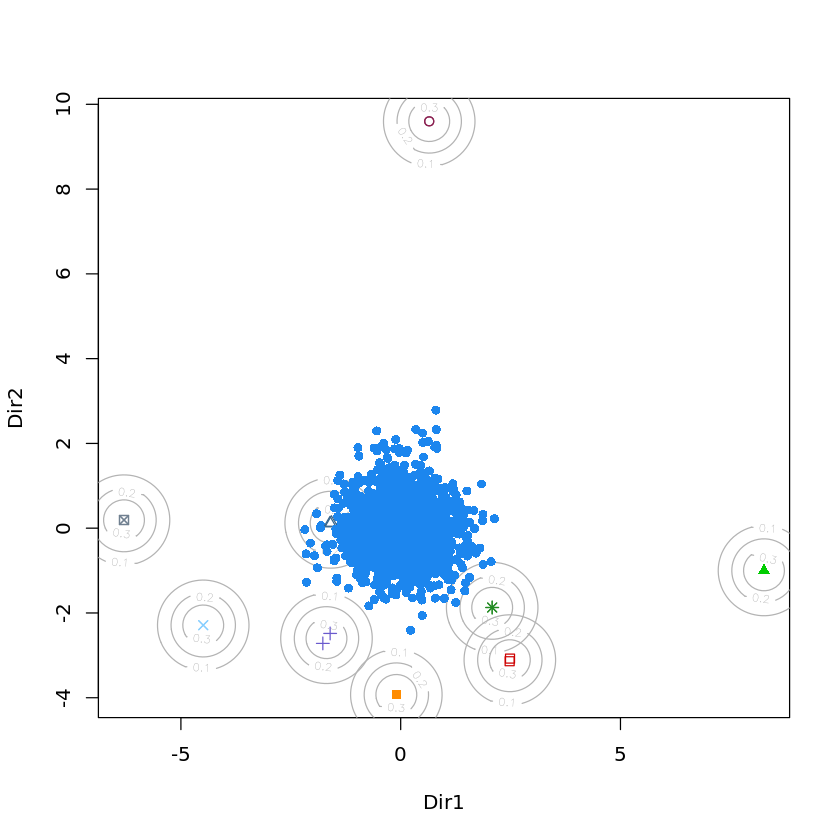

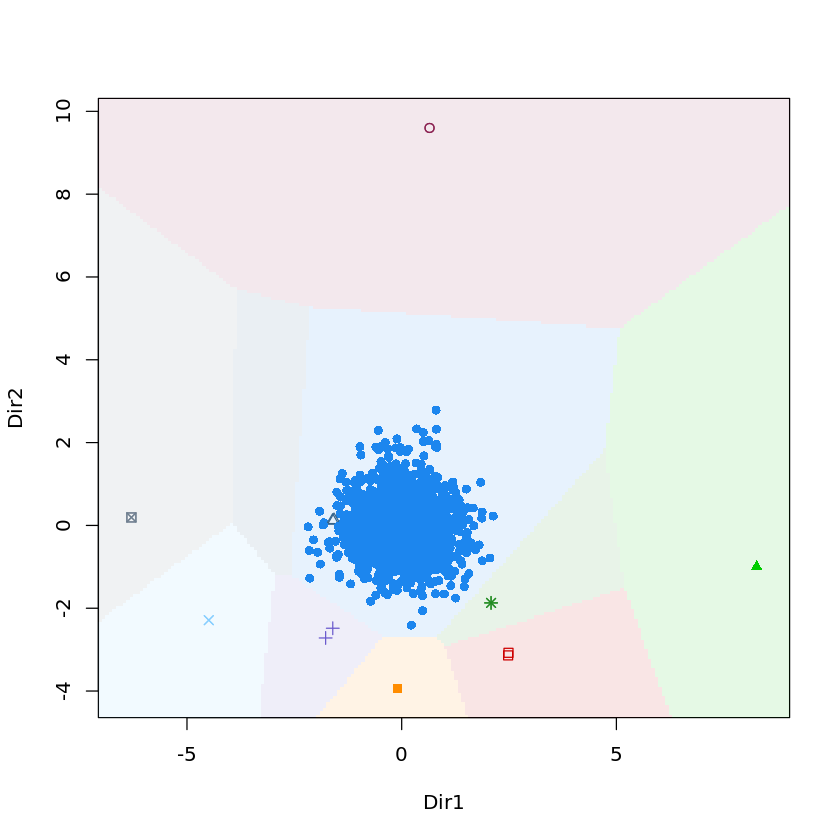

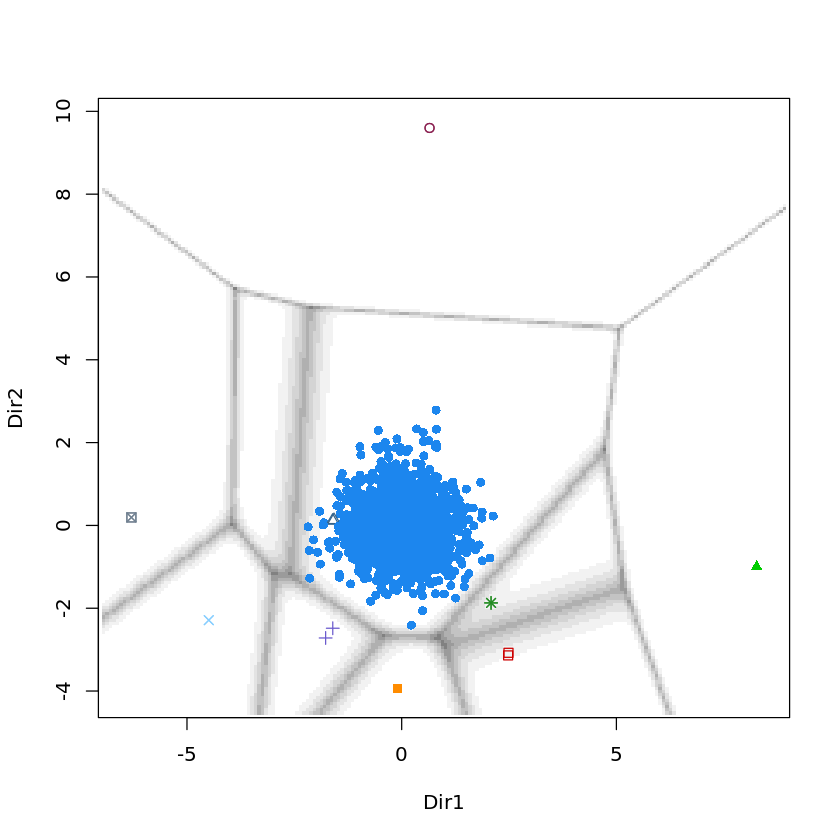

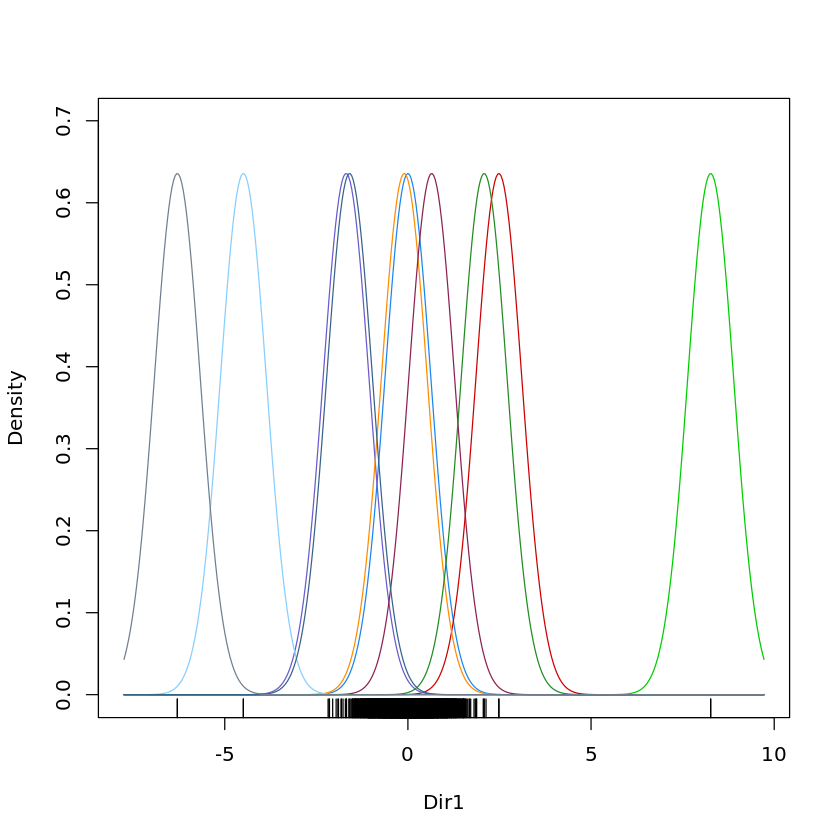

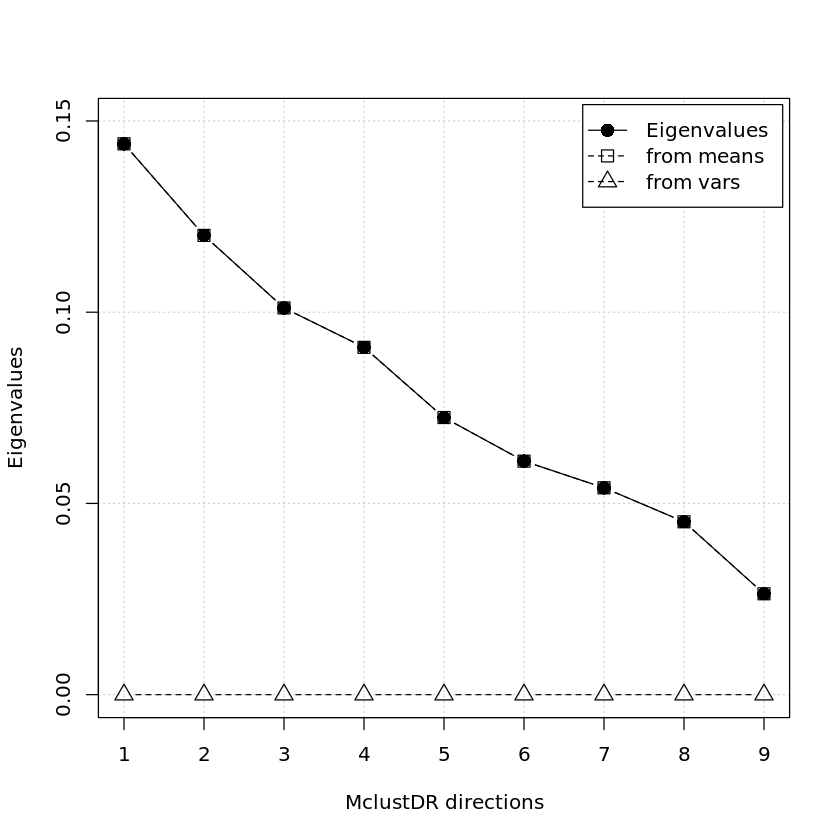

In [ ]:
plot(MclustDR(mmgMclust.mfeat))

## 10. Etude comparative

### Kmeans

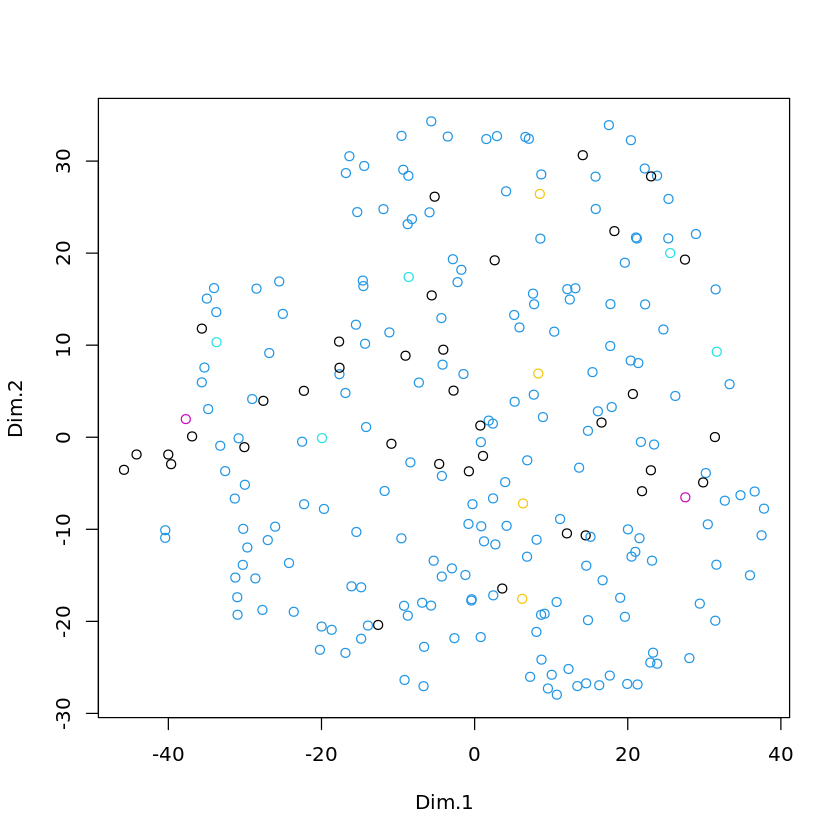

In [ ]:
km.mfeat=NbClust(mfeat$X, method = "kmeans", distance = "euclidean", index = "silhouette",min.nc = 10,max.nc = 10)
plot(pca.mfeat$ind$coord,col=km.mfeat$Best.partition)

In [ ]:
unique(as.vector(mfeat$y))

[1]  1  2  3  4  5  6  7  8  9 10

In [ ]:
table(km.mfeat$Best.partition,as.vector(mfeat$y))

    
       1   2   3   4   5   6   7   8   9  10
  1    3   2   0   3   0 185   5   0   3   8
  2    0   4   3   0   1   1   0  34   2 176
  3    0   0   0 181   0   6   1   0   1   0
  4  193   0   0   1   0   1   4   0 170   1
  5    1  18   0   2 187   1   2   0   3   0
  6    0   2  10   6   0   0   0 142   0   3
  7    1   9  96   6   0   5   0  17   6  12
  8    0   0  91   0   0   0   0   7   5   0
  9    2 165   0   1  12   0   1   0   8   0
  10   0   0   0   0   0   1 187   0   2   0

In [ ]:
(11+7+2+6)/223

[1] 0.1165919

In [ ]:
NMI(km.mfeat$Best.partition,as.vector(mfeat$y))

[1] 0.7477758

In [ ]:
ARI(km.mfeat$Best.partition,as.vector(mfeat$y))

[1] 0.6809902

### Average

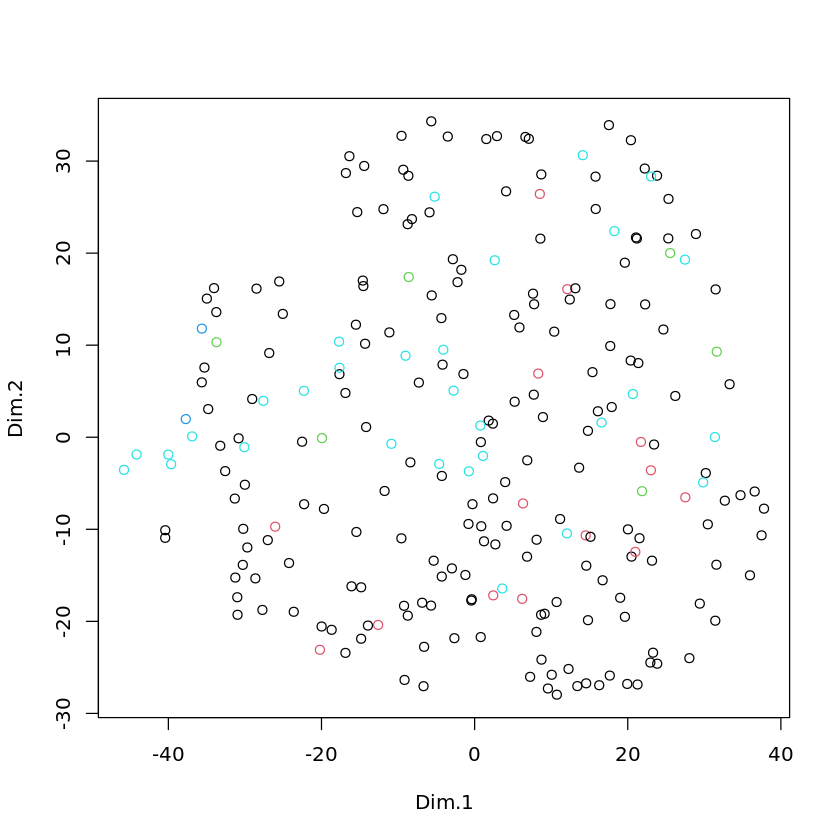

In [ ]:
average.mfeat=NbClust(mfeat$X, method = "average", distance = "euclidean", index = "silhouette",min.nc = 10,max.nc = 10)
plot(pca.mfeat$ind$coord,col=average.mfeat$Best.partition)

In [ ]:
table(average.mfeat$Best.partition,as.vector(mfeat$y))

    
       1   2   3   4   5   6   7   8   9  10
  1  188   1   0   0   0   0   2   0 174   0
  2    9  15   4   9   1   5   0   3  14   1
  3    2  21   0   3   0   4   2   0   9   4
  4    1   2   2 177   1 189   4  46   2 185
  5    0 161   0   0   0   0   0   0   0   1
  6    0   0 194  10   0   2   0 151   0   9
  7    0   0   0   1   0   0   0   0   0   0
  8    0   0   0   0 174   0 183   0   0   0
  9    0   0   0   0  24   0   9   0   0   0
  10   0   0   0   0   0   0   0   0   1   0

In [ ]:
(11+3+1+5+9)/223

[1] 0.1300448

In [ ]:
NMI(average.mfeat$Best.partition,as.vector(mfeat$y))

[1] 0.5846314

In [ ]:
ARI(average.mfeat$Best.partition,as.vector(mfeat$y))

[1] 0.463169

### Ward

In [ ]:
ward.mfeat=NbClust(mfeat$X, method = "ward.D", distance = "euclidean", index = "silhouette",min.nc = 10,max.nc = 10)
plot(pca.mfeat$ind$coord,col=ward.mfeat$Best.partition)

In [ ]:
table(ward.mfeat$Best.partition,as.vector(mfeat$y))

    
       1   2   3   4   5   6   7   8   9  10
  1  193   0   0   0   0   0   0   0   0   0
  2    4 175   4  10  25   7   9   1  14   3
  3    2   1   0   0   0   2  26   0 181   1
  4    1  23   0   3 175   6   2   0   4   5
  5    0   1   1  10   0  33   0  45   0 182
  6    0   0 194   1   0   0   0   0   1   8
  7    0   0   1   0   0   0   0 154   0   0
  8    0   0   0 174   0   2   0   0   0   0
  9    0   0   0   2   0 150   0   0   0   1
  10   0   0   0   0   0   0 163   0   0   0

In [ ]:
(11+1+6+6)/223

[1] 0.1076233

In [ ]:
NMI(ward.mfeat$Best.partition,as.vector(mfeat$y))

[1] 0.7963121

In [ ]:
ARI(ward.mfeat$Best.partition,as.vector(mfeat$y))

[1] 0.7349105

### Complete

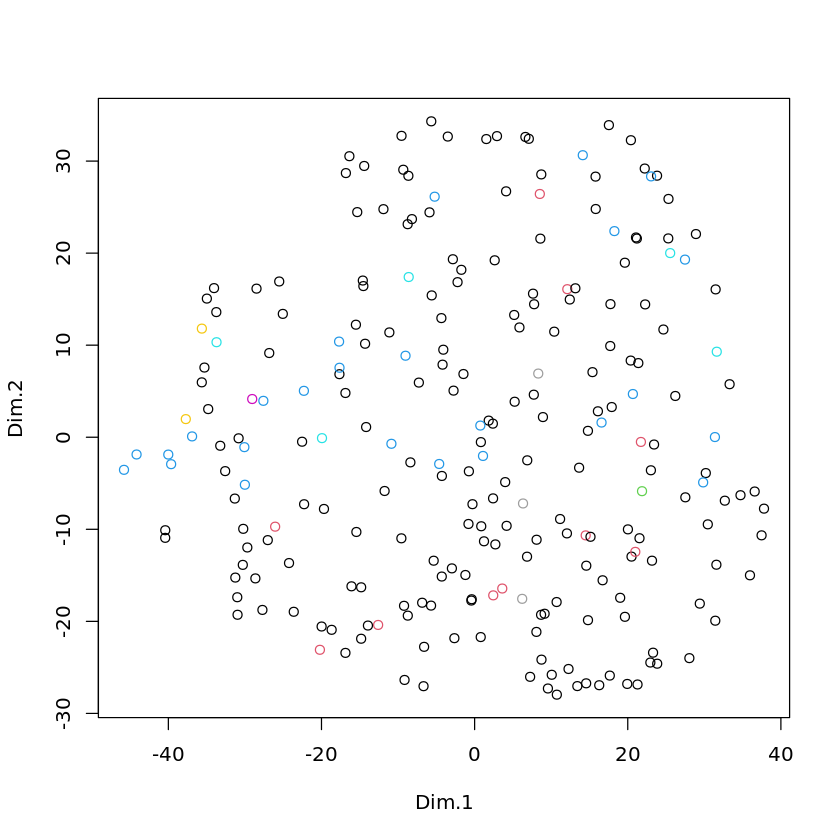

In [ ]:
complete.mfeat=NbClust(mfeat$X, method = "complete", distance = "euclidean", index = "silhouette",min.nc = 10,max.nc = 10)
plot(pca.mfeat$ind$coord,col=complete.mfeat$Best.partition)

In [ ]:
table(complete.mfeat$Best.partition,as.vector(mfeat$y))

    
       1   2   3   4   5   6   7   8   9  10
  1  186   0   0  12   0   5   3   0  30   0
  2    9   5   0  28   0   5   1   0  16   0
  3    1   0   0   0  90   3 132   0  10   0
  4    1 132   0 130   1 114   2  11 124  76
  5    1  17  69   3   0   3   1   0   5   0
  6    1   1   0   2   0  65   2   0   0   2
  7    1   1  71  20   0   2   0 143  14 121
  8    0   8  60   4   0   3   0  46   0   1
  9    0  36   0   1  25   0   9   0   1   0
  10   0   0   0   0  84   0  50   0   0   0

In [ ]:
(11+9+1+6+5+6+9)/223

[1] 0.2107623

In [ ]:
NMI(complete.mfeat$Best.partition,as.vector(mfeat$y))

[1] 0.4697454

In [ ]:
ARI(complete.mfeat$Best.partition,as.vector(mfeat$y))

[1] 0.2846244

### Single

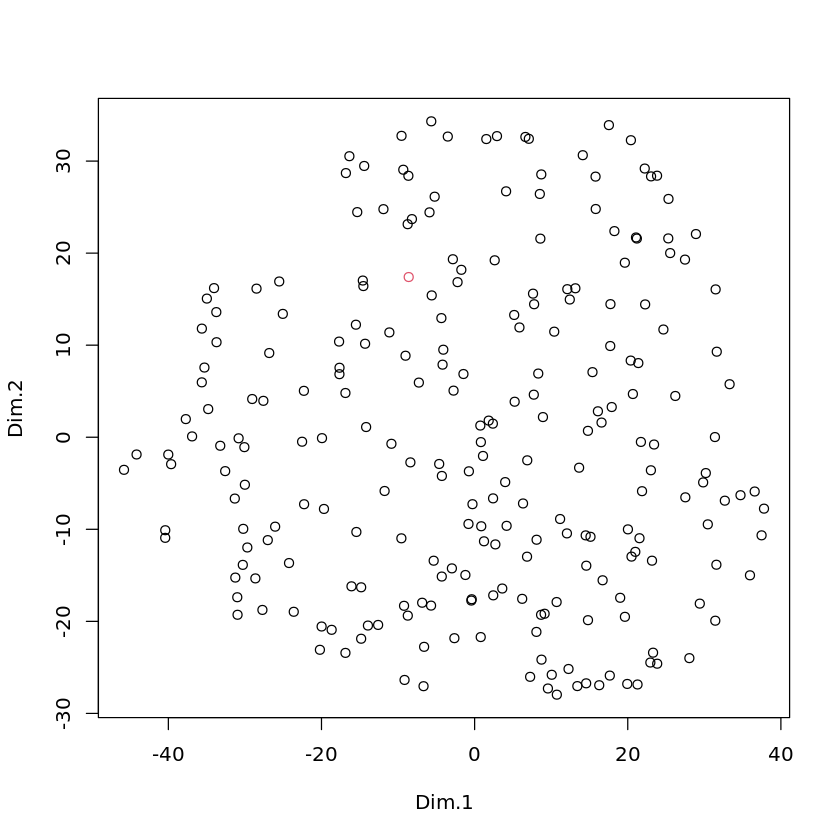

In [ ]:
single.mfeat=NbClust(mfeat$X, method = "single", distance = "euclidean", index = "silhouette",min.nc = 10,max.nc = 10)
plot(pca.mfeat$ind$coord,col=single.mfeat$Best.partition)

In [ ]:
table(single.mfeat$Best.partition,as.vector(mfeat$y))

    
       1   2   3   4   5   6   7   8   9  10
  1  199 199 200 195 200 199 199 200 199 200
  2    1   0   0   0   0   0   0   0   0   0
  3    0   1   0   0   0   0   0   0   0   0
  4    0   0   0   1   0   0   0   0   0   0
  5    0   0   0   2   0   0   0   0   0   0
  6    0   0   0   1   0   0   0   0   0   0
  7    0   0   0   1   0   0   0   0   0   0
  8    0   0   0   0   0   1   0   0   0   0
  9    0   0   0   0   0   0   1   0   0   0
  10   0   0   0   0   0   0   0   0   1   0

In [ ]:
NMI(single.mfeat$Best.partition,as.vector(mfeat$y))

[1] 0.005010967

In [ ]:
ARI(single.mfeat$Best.partition,as.vector(mfeat$y))

[1] 7.197997e-06

### MMG

In [ ]:
plot(pca.mfeat$ind$coord,col=mmgRmix.mfeat@bestResult@partition)

In [ ]:
table(mmgRmix.mfeat@bestResult@partition,as.vector(mfeat$y))

    
       1   2   3   4   5   6   7   8   9  10
  1    0   0  19   1   0  20   0  72   0  57
  2    5  18   1   3  89   7 111   0   7   1
  3  104   0   0   0   0  14   0   0  19   0
  4    1  13  30   6   6   4   1  17   0   2
  5   42   0   0   0   0  81  12   0 135   6
  6    0   2   0   0  99   0  74   0   0   0
  7    9 165   0 187   6  23   2   3  37   1
  8    2   2   0   0   0  50   0  27   2 129
  9   37   0   0   0   0   0   0   0   0   0
  10   0   0 150   3   0   1   0  81   0   4

In [ ]:
NMI(mmgRmix.mfeat@bestResult@partition,as.vector(mfeat$y))

[1] 0.5203494

In [ ]:
ARI(mmgRmix.mfeat@bestResult@partition,as.vector(mfeat$y))

[1] 0.3645771

In [ ]:
table( mmgMclust.mfeat$classification,mfeat$y)

    
       1   2   3   4   5   6   7   8   9  10
  1  200 198 200 198 200 196 196 196 200 198
  2    0   2   0   0   0   0   0   0   0   0
  3    0   0   0   2   0   0   0   0   0   0
  4    0   0   0   0   0   2   0   0   0   0
  5    0   0   0   0   0   2   0   0   0   0
  6    0   0   0   0   0   0   2   0   0   0
  7    0   0   0   0   0   0   2   0   0   0
  8    0   0   0   0   0   0   0   2   0   0
  9    0   0   0   0   0   0   0   2   0   0
  10   0   0   0   0   0   0   0   0   0   2

In [ ]:
NMI(mmgMclust.mfeat$classification,as.vector(mfeat$y))

[1] 0.009015127

In [ ]:
ARI(mmgMclust.mfeat$classification,as.vector(mfeat$y))

[1] 1.566403e-05

### Conclusion

On peut voir que MMG>Ward>Kmeans >> Complete > Average >> Single

## t-SNE

### MMG

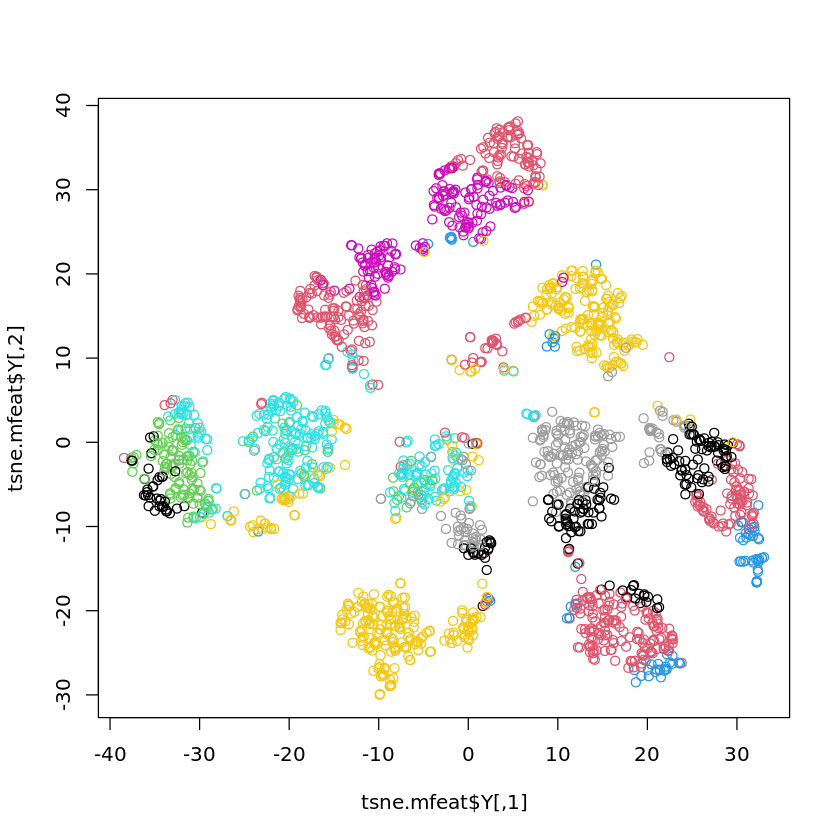

In [ ]:
plot(tsne.mfeat$Y,col=mmgRmix.mfeat@bestResult@partition)

### Kmeans

In [ ]:
plot(tsne.mfeat$Y,col=km.mfeat$Best.partition)

### Average

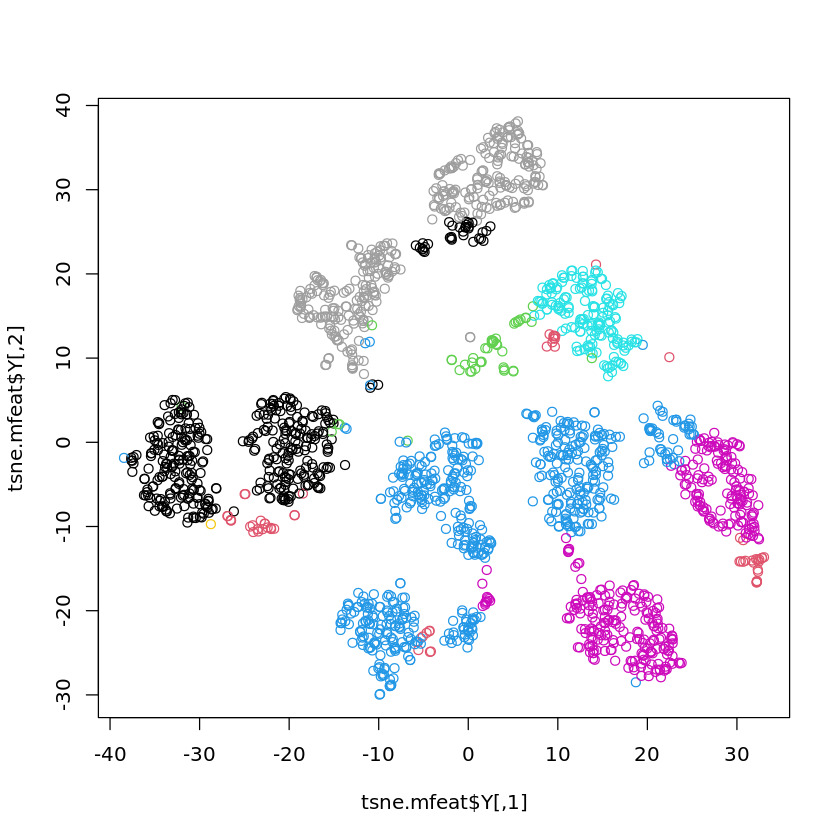

In [ ]:
plot(tsne.mfeat$Y,col=average.mfeat$Best.partition)

### Ward

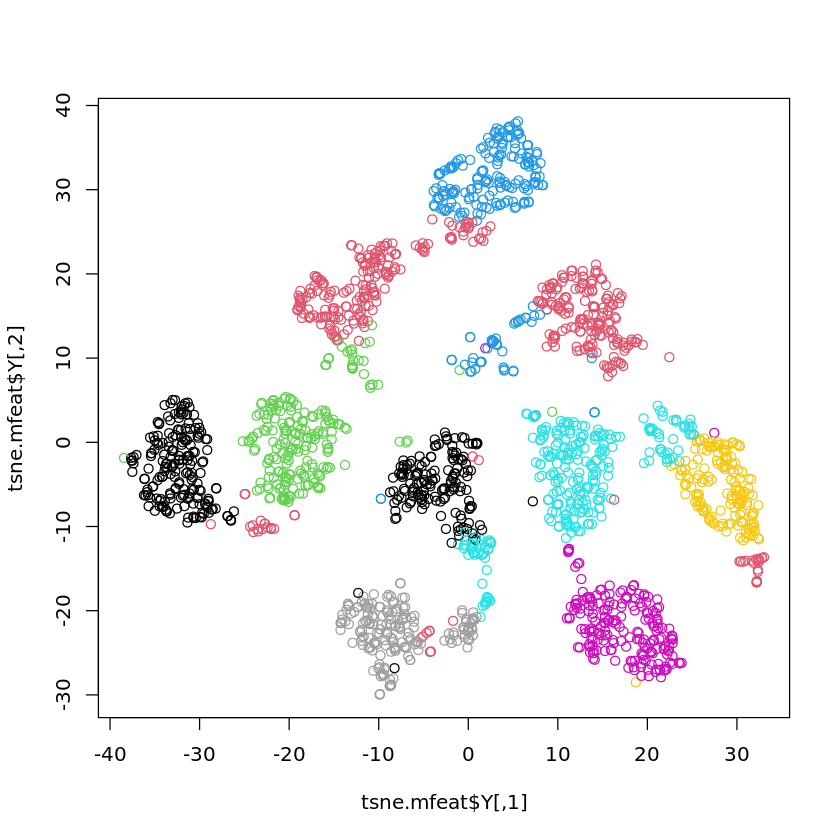

In [ ]:
plot(tsne.mfeat$Y,col=ward.mfeat$Best.partition)

### Single

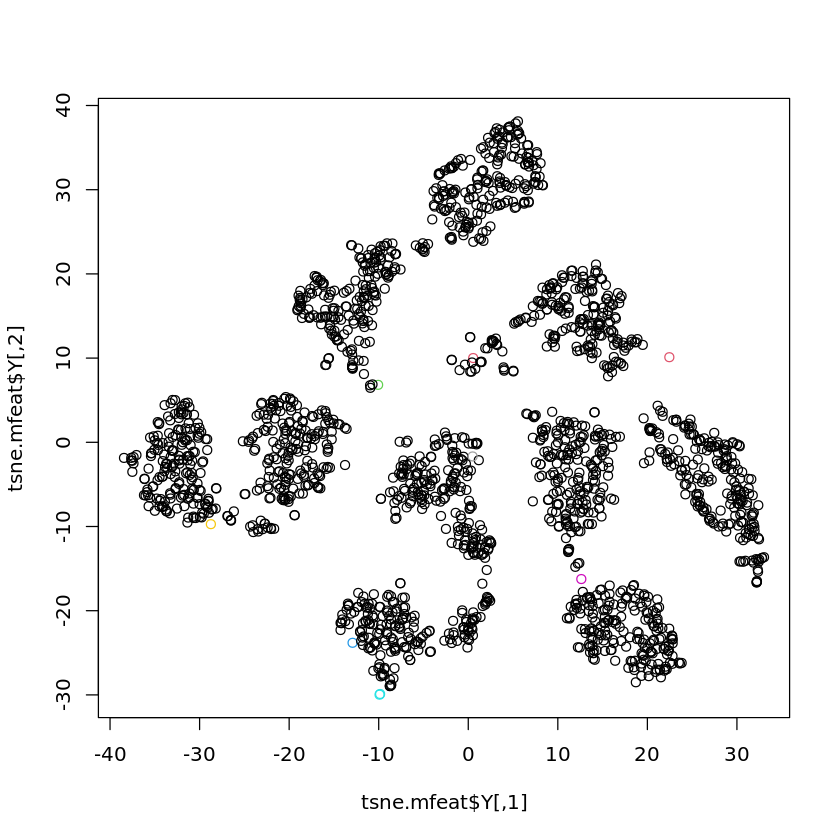

In [ ]:
plot(tsne.mfeat$Y,col=single.mfeat$Best.partition)

### Complete

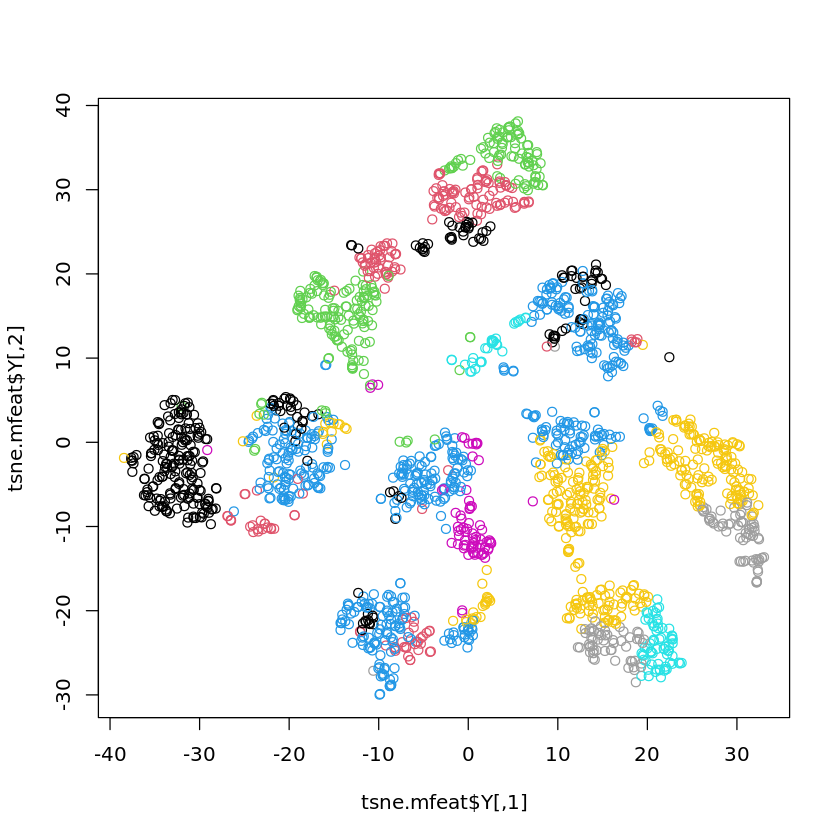

In [ ]:
plot(tsne.mfeat$Y,col=complete.mfeat$Best.partition)

## UMAP

In [ ]:
umap.mfeat = umap(mfeat$X)

In [ ]:
umap.mfeat

umap embedding of 2000 items in 2 dimensions
object components: layout, data, knn, config



### MMG

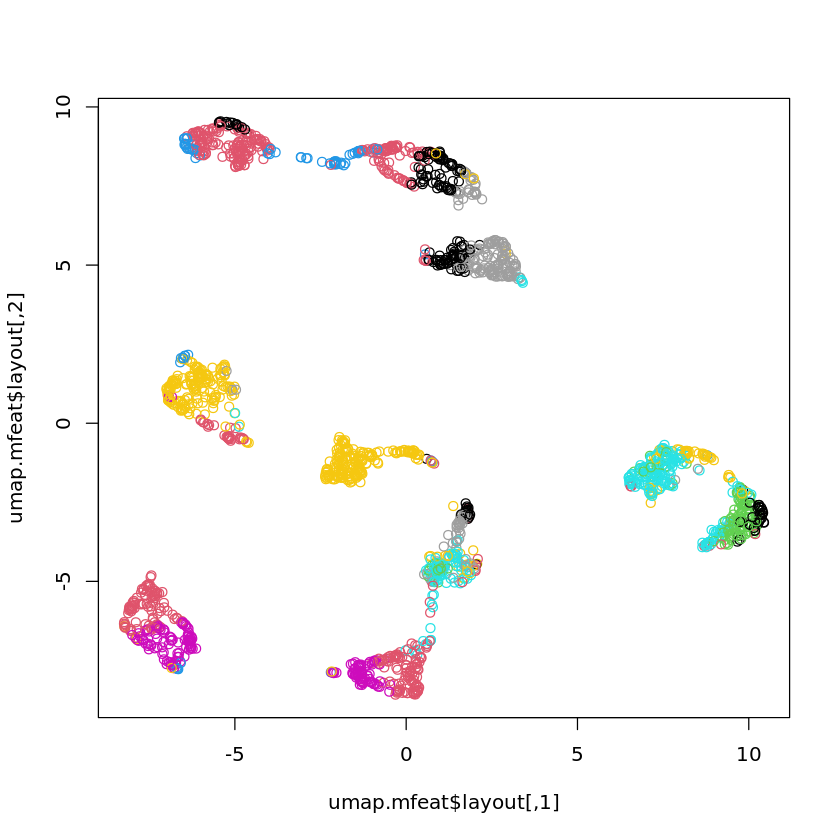

In [ ]:
plot(umap.mfeat$layout,col=mmgRmix.mfeat@bestResult@partition)

### Kmeans

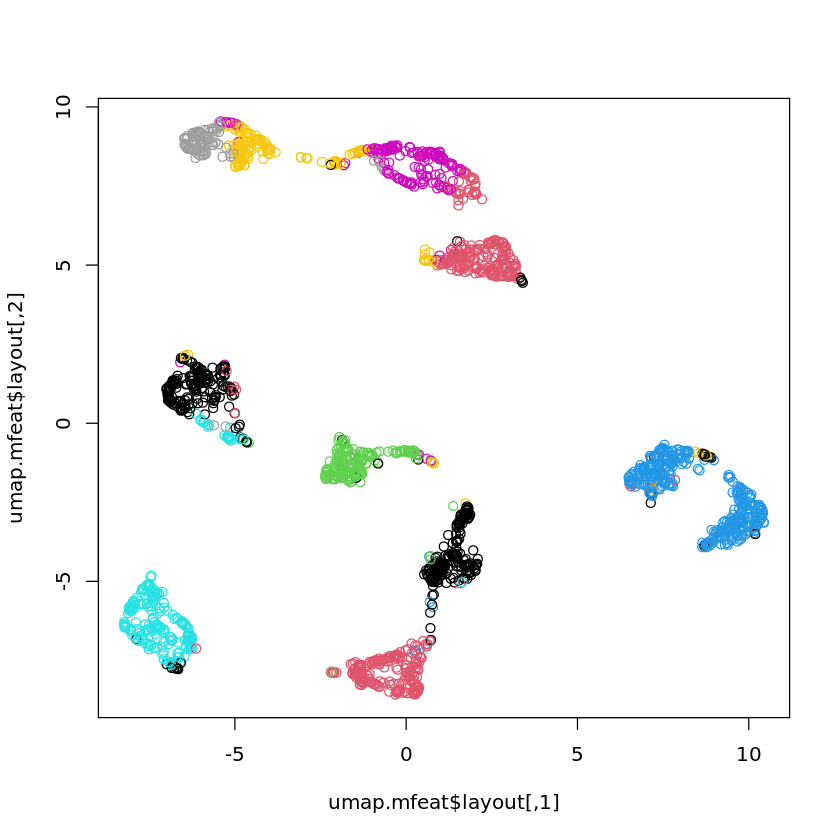

In [ ]:
plot(umap.mfeat$layout,col=km.mfeat$Best.partition)

### Average

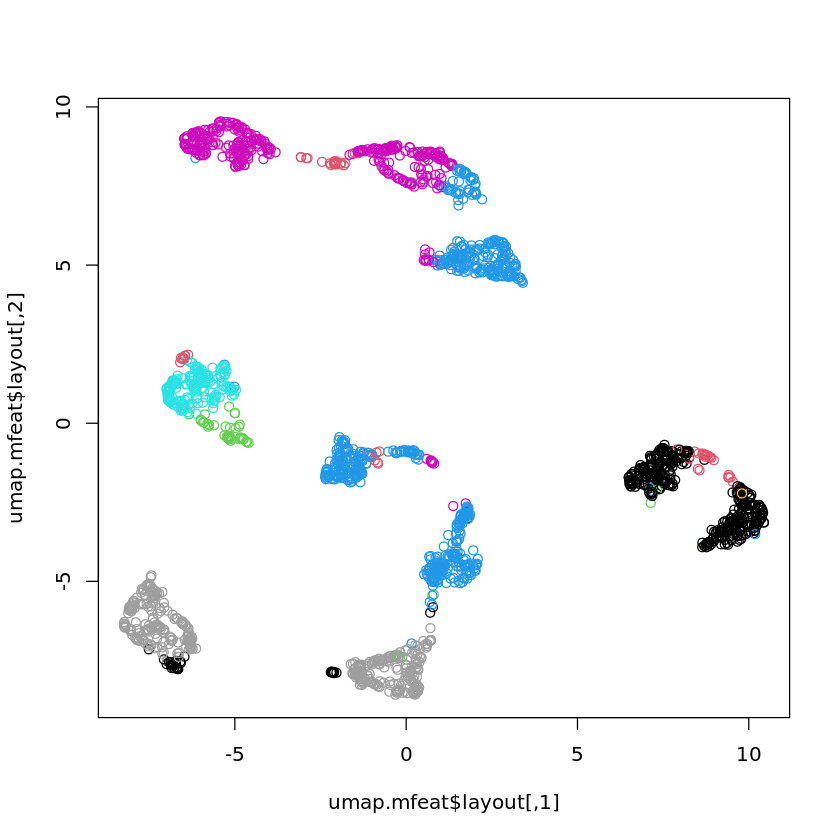

In [ ]:
plot(umap.mfeat$layout,col=average.mfeat$Best.partition)

### Ward

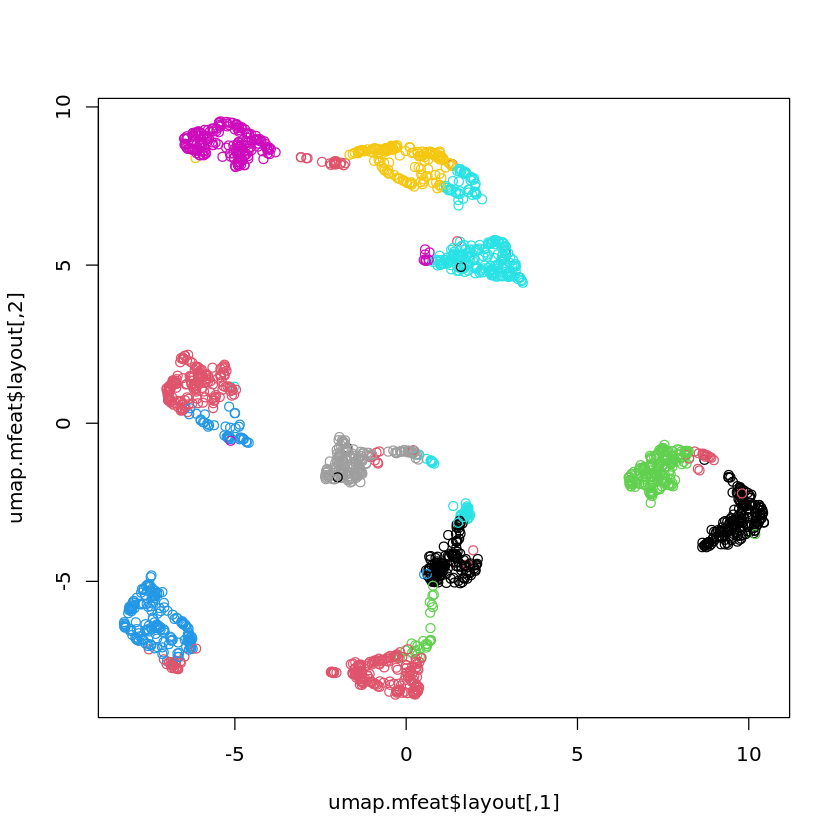

In [ ]:
plot(umap.mfeat$layout,col=ward.mfeat$Best.partition)

### Single

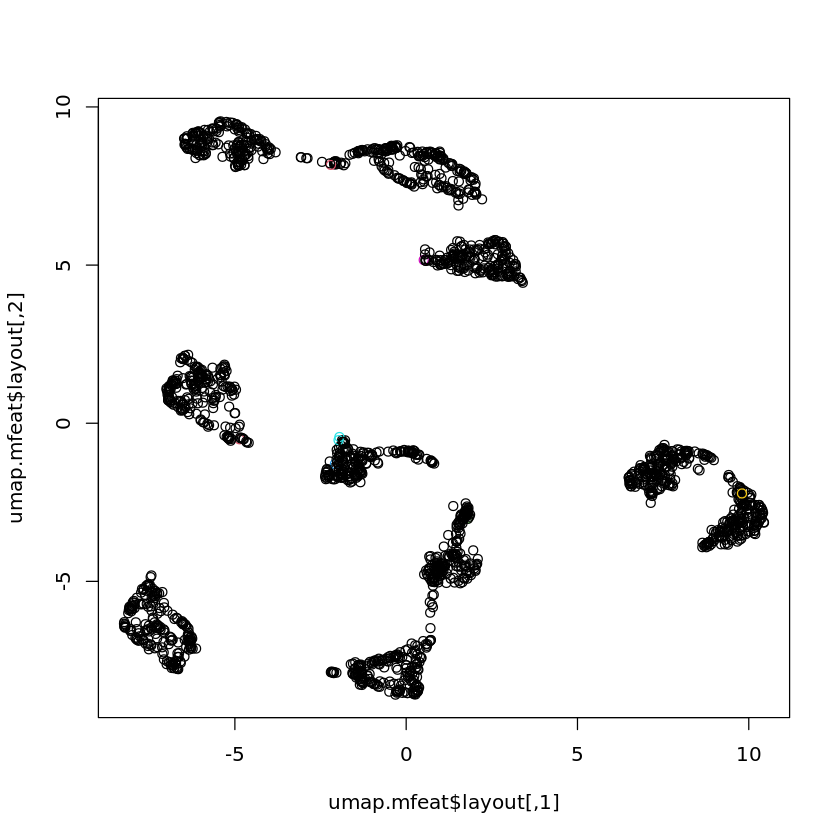

In [ ]:
plot(umap.mfeat$layout,col=single.mfeat$Best.partition)

### Complete

In [ ]:
plot(umap.mfeat$layout,col=complete.mfeat$Best.partition)

## Autoencoder

In [ ]:
mfeat_reduced <- read.csv(file = 'data/mfeat_reduced.csv', header=F)

In [ ]:
mmgMclust.mfeat_reduced=Mclust(data= mfeat_reduced)

In [ ]:
mmgMclust.mfeat_reduced

'Mclust' model object: (VVE,7) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "loglik"        
 [9] "df"             "bic"            "icl"            "hypvol"        
[13] "parameters"     "z"              "classification" "uncertainty"   

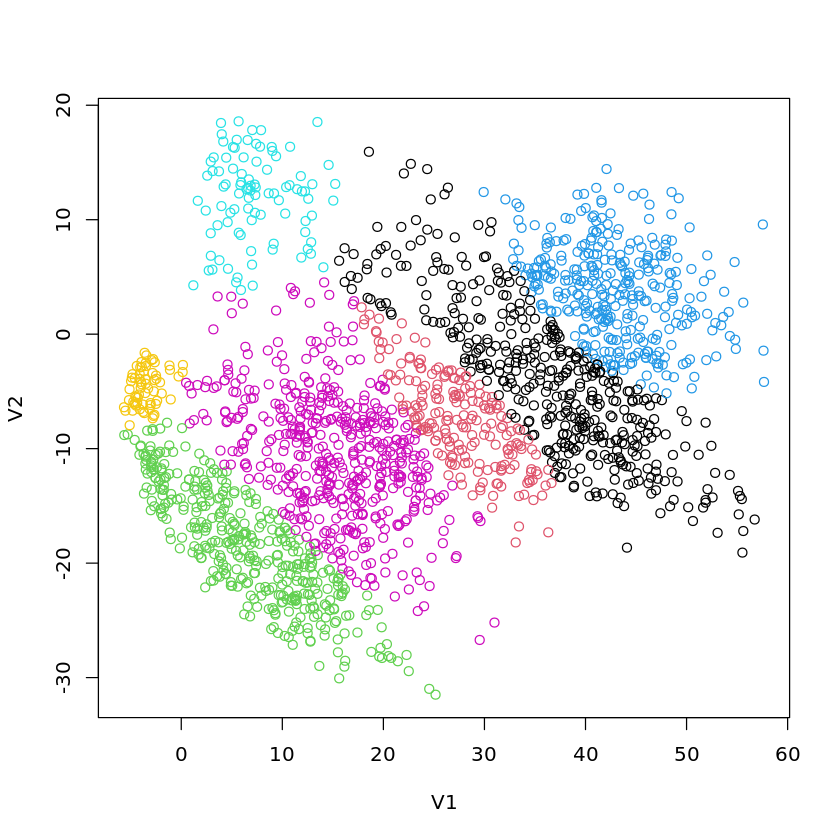

In [ ]:
plot(mfeat_reduced,col=mmgMclust.mfeat_reduced$classification)

In [ ]:
table(mmgMclust.mfeat_reduced$classification,mfeat$y)

   
      1   2   3   4   5   6   7   8   9  10
  1 150  33  13   1  55   7  29   0 121   3
  2  20  37  10  21  13  49  11   1  42   0
  3   0  48   1  60   1  19   0 114   0 151
  4  29   4   0   0 126   0 156   0  22   0
  5   0   2  90   0   0   0   0   0   1   0
  6   1  76  85 118   5 125   4  21  14  46
  7   0   0   1   0   0   0   0  64   0   0

In [ ]:
NMI(mmgMclust.mfeat_reduced$classification,as.vector(mfeat$y))

[1] 0.3588544

In [ ]:
ARI(mmgMclust.mfeat_reduced$classification,as.vector(mfeat$y))

[1] 0.2328656

Ya peu de donnees l'autenencoder pour bien apprender une bonne representation

## Testing MMG avec UMAP

In [ ]:
mmgMclust.mfeat_umap=Mclust(data= umap.mfeat$layout)

In [ ]:
mmgMclust.mfeat_umap

'Mclust' model object: (VVV,9) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "loglik"        
 [9] "df"             "bic"            "icl"            "hypvol"        
[13] "parameters"     "z"              "classification" "uncertainty"   

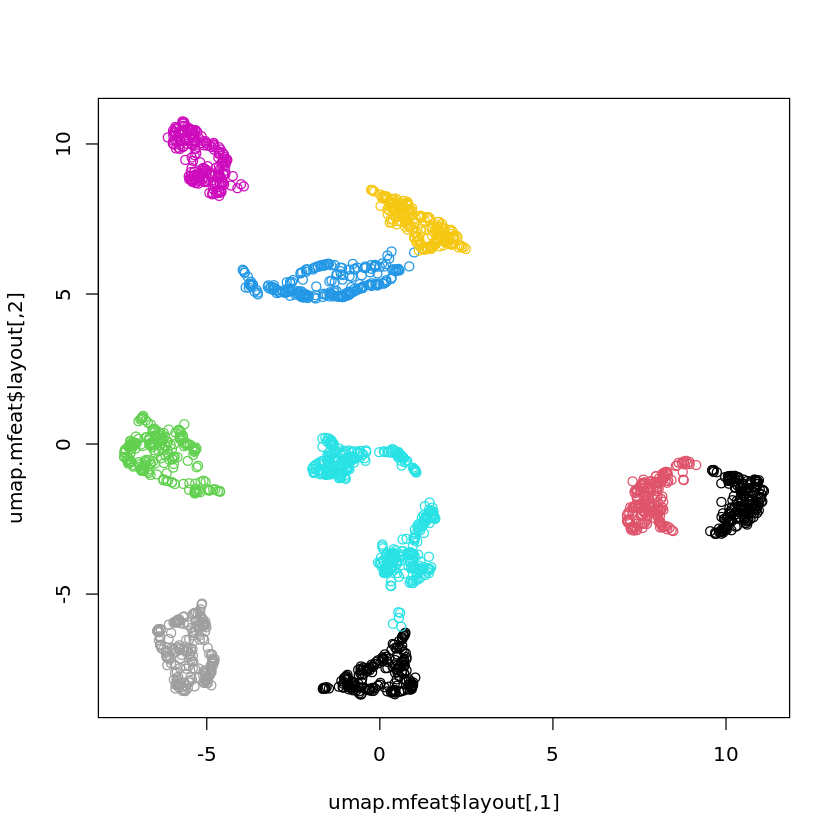

In [ ]:
plot(umap.mfeat$layout,col=mmgMclust.mfeat_umap$classification)

In [ ]:
table(mmgMclust.mfeat_umap$classification,mfeat$y)

   
      1   2   3   4   5   6   7   8   9  10
  1 194   0   0   1   0   0   0   0   0   0
  2   5   0   0   0   0   0   0   0 194   0
  3   1 191   0   3   1   4   1   0   5   5
  4   0   8   5   3   0   3   0 200   1   3
  5   0   1   0 192   0 192   6   0   0   0
  6   0   0 194   1   0   0   0   0   0   3
  7   0   0   1   0   1   1   0   0   0 189
  8   0   0   0   0 198   0   2   0   0   0
  9   0   0   0   0   0   0 191   0   0   0

In [ ]:
NMI(mmgMclust.mfeat_umap$classification,as.vector(mfeat$y))

[1] 0.870099

In [ ]:
ARI(mmgMclust.mfeat_umap$classification,as.vector(mfeat$y))

[1] 0.8359902

Utilisation de UMAP permet d'avoir un representations des classes qui sont separable et permet au modeles d'avoir des meilleures performances